In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [5]:
fuel_econ = pd.read_csv('fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


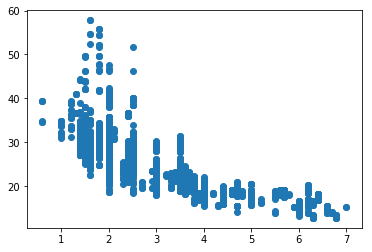

In [6]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');

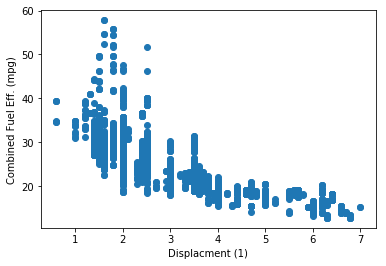

In [7]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacment (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

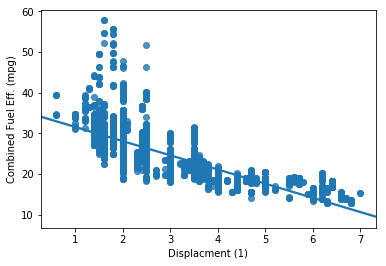

In [8]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacment (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

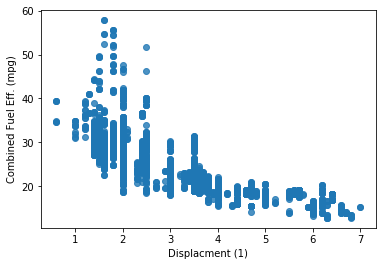

In [9]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', fit_reg = False);
plt.xlabel('Displacment (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

## Overplotting, Transparency, and Jitter

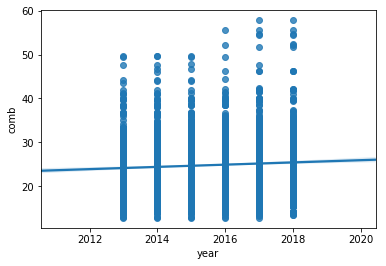

In [11]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb');

> The regression line that got fit suggest a slight upward trend in efficiency, But this is not clear from the data.
<br></br>
> The only point that we can really make out are those above 42 miles per gallon.

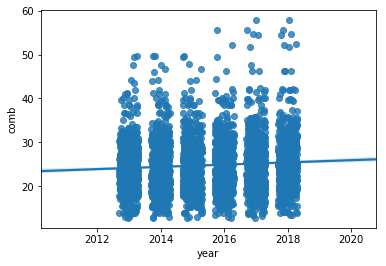

In [16]:
# Let's start with Jitter
# The value 0.3 means that each x value will be adjusted randomly up to 0.3 more or 0.3 less
# It should be noted that this only works with seaborn.regplot() function and not matplotlib.scatter()

sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3);

> This is still not enough to really see the distibution of points below the mid 30
<br></br>
We should add some trancparency

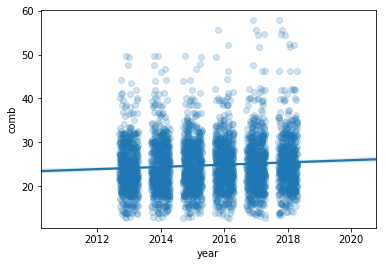

In [17]:
# alpha takes avalue between 0 and 1 that specifies the opaqueness of points
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3,
           scatter_kws = {'alpha' : 1/5});

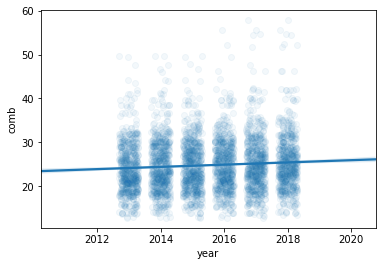

In [15]:
# Let's start with Jitter
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3,
           scatter_kws = {'alpha' : 1/20});

## Heat Maps

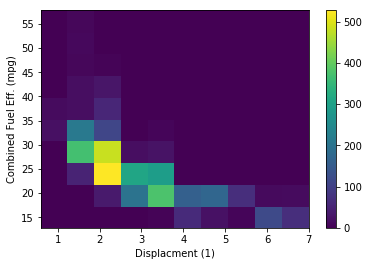

In [20]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb');
plt.colorbar()
plt.xlabel('Displacment (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

> By default each dimension is split into 10 bin and the number of points in each rectangular bin is counted up,
<br></br>
> Each count is associated with a color.
<br></br>
> And this default matplotlib color palette called Viridis

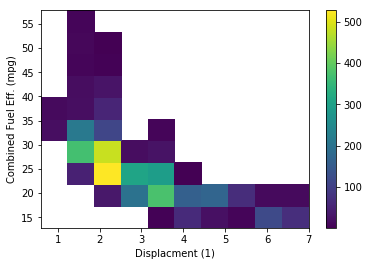

In [21]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5);
plt.colorbar()
plt.xlabel('Displacment (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

> By setting cmin to a value such as 0.5 , any bin with no counts will return as not a number and not get coloed in
<br></br>
> Since white now represents 0 , we should choose a reversed color palette where darker color are associated with higher value

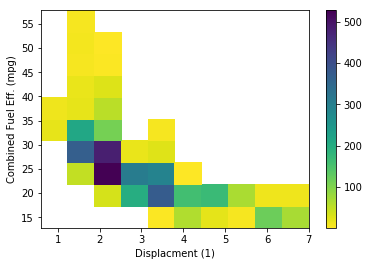

In [23]:
# Set cmap = 'viridis_r'
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
           cmap = 'viridis_r');
plt.colorbar()
plt.xlabel('Displacment (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

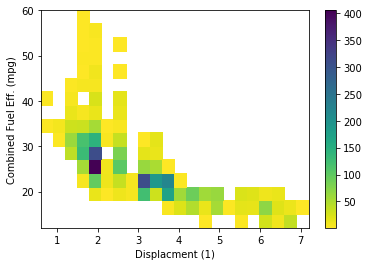

In [25]:
# Finally, Let's change the bins
# But first look at the statistics with describe()

bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
           cmap = 'viridis_r', bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Displacment (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In [24]:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400
